In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
csvpath ="./Resources/AGE - household purchases Agg Data.csv"

In [4]:
df_age = pd.read_csv(csvpath)

In [5]:
df_age.head()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [5]:
df_age.columns

Index(['Code', 'Food Category', 'Food Group', 'Major Food Code',
       'Minor Food Code', 'Age Group', 'Units', '2001-02', '2002-03',
       '2003-04', '2004-05', '2005-06', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '201516', '201617', '201718',
       '201819', 'RSE indicator(a)', '% change since 201516', 'sig(b)',
       'trend since 201516(c)'],
      dtype='object')

In [9]:
df_age.fillna("NaN"=="-")

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,False,False,False,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,False,False
1,4006,False,"Liquid wholemilk, including school and welfare",False,False,30-39,ml,629,593,609,...,335,364,385,320,398,432,False,+12,False,False
2,4,False,False,"Liquid wholemilk, full price",False,30-39,ml,615,572,589,...,335,364,385,320,398,432,False,+12,False,False
3,402,False,False,False,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,False,False
4,403,False,False,False,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,387,False,False,Spirits,False,75_and_over,ml,63,61,59,...,59,58,53,54,73,47,û,-11,False,False
1683,388,False,False,Liqueurs and cocktails,False,75_and_over,ml,3,7,4,...,3,9,9,11,11,4,û,-55,False,False
1684,389,False,False,Alcopops,False,75_and_over,ml,1,2,4,...,4,1,1,1,7,0,û,-100,False,False
1685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
new_df=df_age.drop(["Code","Food Category", "Food Group", "RSE indicator(a)", "sig(b)",
       "trend since 201516(c)" ],axis=1)
new_df

,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,% change since 201516
0,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781","1,823","1,767",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",-2
1,NaN,NaN,30-39,ml,629,593,609,565,553,532,...,404,374,328,335,364,385,320,398,432,+12
2,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,534,517,...,404,374,328,335,364,385,320,398,432,+12
3,NaN,UHT milk,30-39,ml,11,5,11,17,11,8,...,3,2,3,4,8,8,0,9,5,-30
4,NaN,Sterilised,30-39,ml,16,11,2,5,0,0,...,0,4,0,0,1,1,0,3,0,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,Spirits,NaN,75_and_over,ml,63,61,59,42,47,63,...,51,55,49,59,58,53,54,73,47,-11
1683,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,7,7,...,8,5,7,3,9,9,11,11,4,-55
1684,Alcopops,NaN,75_and_over,ml,1,2,4,1,4,1,...,7,4,4,4,1,1,1,7,0,-100
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
new_df.columns

Index(['Major Food Code', 'Minor Food Code', 'Age Group', 'Units', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '201516',
       '201617', '201718', '201819', '% change since 201516'],
      dtype='object')

In [17]:
riceinfo= new_df.loc[(new_df["Minor Food Code"] == "Dried rice")]
riceage=riceinfo.loc[(riceinfo["Age Group"]== "30-39")]
cleanrice=riceage.drop(["Major Food Code", "Units", "Age Group"], axis=1)
cleanrice=cleanrice.transpose()
cleanrice.columns =['Amount']
cleanrice['Years'] = cleanrice.index
cleanrice.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Minor Food Code to % change since 201516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  21 non-null     object
 1   Years   21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [19]:
newest_df = df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)

In [20]:
newest_df.columns

Index(['Food Category', 'Food Group', 'Major Food Code', 'Minor Food Code',
       'Age Group', 'Units', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '201516', '201617', '201718', '201819'],
      dtype='object')

In [23]:
riceinfo= new_df.loc[(new_df["Minor Food Code"] == "Dried rice")]
riceage=riceinfo.loc[(riceinfo["Age Group"]== "30-39")]
cleanrice=riceage.drop(["Major Food Code", "Units", "Age Group"], axis=1)
cleanrice=cleanrice.transpose()
cleanrice.columns =['Amount']
cleanrice['Years'] = cleanrice.index
cleanrice.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Minor Food Code to % change since 201516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  21 non-null     object
 1   Years   21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [125]:
numofrice=cleanrice['Amount']
years=cleanrice["Years"]

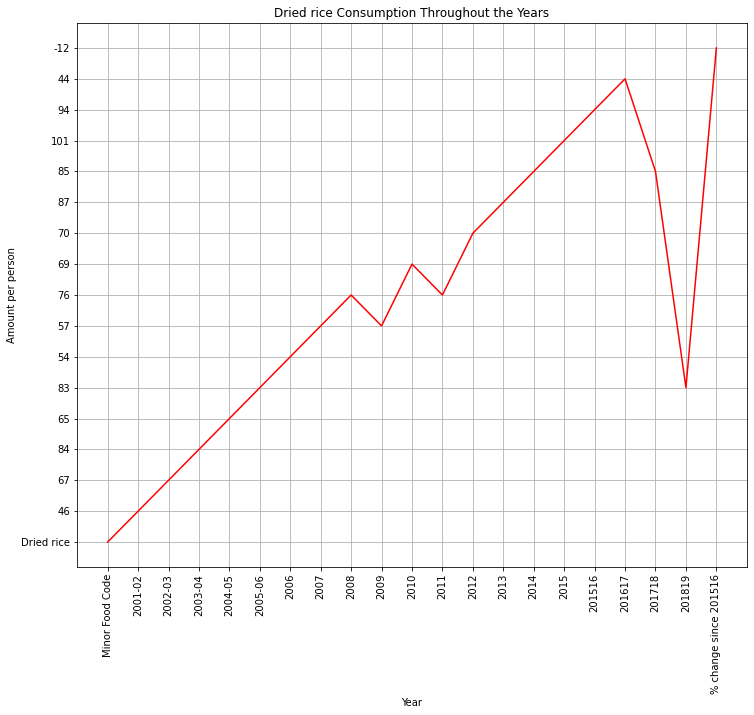

<Figure size 432x288 with 0 Axes>

In [128]:
ln,plot=plt.subplots (figsize=(12, 10))
plt.plot(years,numofrice,color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Amount per person")
plt.title("Dried rice Consumption Throughout the Years")
plt.show ()
plt.savefig('./Resources/data_output_images/image_file3.png', dpi=300, bbox_inches='tight')

ANALYSIS
# We can see the huge drop in the consumption of dried rice between 2016/17 and suddenly went back up again between 2017/18
# Now i am going to compare the consumption of dried rice between all age groups and see if this trend is similar between that period of time

In [35]:
rice2info= new_df.loc[(new_df["Minor Food Code"] == "Dried rice")]
rice2age=rice2info.loc[(rice2info["Age Group"]=="30-39")]
cleanrice=rice2age.drop(["Major Food Code"], axis=1)
cleanrice=cleanrice.transpose()
cleanrice.columns =['Amount']
cleanrice['Years'] = cleanrice.index
cleanrice.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Minor Food Code to % change since 201516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  23 non-null     object
 1   Years   23 non-null     object
dtypes: object(2)
memory usage: 552.0+ bytes


In [37]:
rice2info.head()

,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,% change since 201516
259,NaN,Dried rice,30-39,g,46,67,84,65,83,54,...,76,70,87,85,101,94,44,85,83,-12
596,NaN,Dried rice,40-49,g,52,54,64,46,62,56,...,65,69,59,64,72,71,70,71,82,+14
933,NaN,Dried rice,50-64,g,58,72,45,58,55,76,...,80,68,68,84,68,62,51,77,70,+12
1270,NaN,Dried rice,65-74,g,45,48,24,40,67,50,...,40,43,30,37,42,41,35,29,51,+23
1607,NaN,Dried rice,75_and_over,g,18,29,18,27,25,25,...,18,61,19,31,26,23,20,16,37,+59


In [36]:
cleanrice.head()

,Amount,Years
Minor Food Code,Dried rice,Minor Food Code
Age Group,30-39,Age Group
Units,g,Units
2001-02,46,2001-02
2002-03,67,2002-03


In [50]:
rice2info.head()

,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,% change since 201516
259,NaN,Dried rice,30-39,g,46,67,84,65,83,54,...,76,70,87,85,101,94,44,85,83,-12
596,NaN,Dried rice,40-49,g,52,54,64,46,62,56,...,65,69,59,64,72,71,70,71,82,+14
933,NaN,Dried rice,50-64,g,58,72,45,58,55,76,...,80,68,68,84,68,62,51,77,70,+12
1270,NaN,Dried rice,65-74,g,45,48,24,40,67,50,...,40,43,30,37,42,41,35,29,51,+23
1607,NaN,Dried rice,75_and_over,g,18,29,18,27,25,25,...,18,61,19,31,26,23,20,16,37,+59


In [51]:
df = rice2info

In [61]:
df[df.columns[1:23]]

,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,2007,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
259,Dried rice,30-39,g,46,67,84,65,83,54,57,...,69,76,70,87,85,101,94,44,85,83
596,Dried rice,40-49,g,52,54,64,46,62,56,79,...,72,65,69,59,64,72,71,70,71,82
933,Dried rice,50-64,g,58,72,45,58,55,76,77,...,68,80,68,68,84,68,62,51,77,70
1270,Dried rice,65-74,g,45,48,24,40,67,50,50,...,28,40,43,30,37,42,41,35,29,51
1607,Dried rice,75_and_over,g,18,29,18,27,25,25,15,...,20,18,61,19,31,26,23,20,16,37


In [86]:

cleanrice=riceinfo.drop(["Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleanrice=cleanrice.transpose ()
cleanrice.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleanrice['Years'] = cleanrice.index
cleanrice

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,46,52,58,45,18,2001-02
2002-03,67,54,72,48,29,2002-03
2003-04,84,64,45,24,18,2003-04
2004-05,65,46,58,40,27,2004-05
2005-06,83,62,55,67,25,2005-06
2006,54,56,76,50,25,2006
2007,57,79,77,50,15,2007
2008,76,73,76,27,22,2008
2009,57,82,52,35,19,2009
2010,69,72,68,28,20,2010


In [87]:
new_data=cleanrice.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
new_data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2001-02 to % change since 201516
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        20 non-null     int64 
 1   40-49        20 non-null     int64 
 2   50-64        20 non-null     int64 
 3   65-74        20 non-null     int64 
 4   75_and_over  20 non-null     int64 
 5   Years        20 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [88]:
final_plot=new_data["Years"]

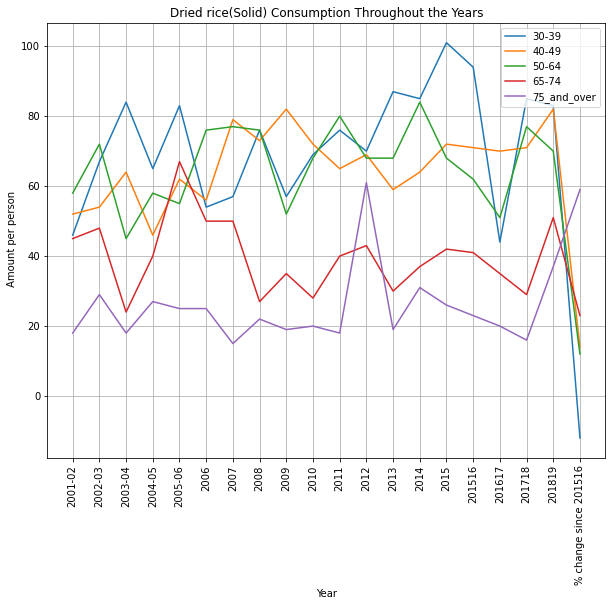

<Figure size 432x288 with 0 Axes>

In [123]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(final_plot,new_data['30-39'])
plt.plot(final_plot,new_data['40-49'])
plt.plot(final_plot,new_data['50-64'])
plt.plot(final_plot,new_data['65-74'])
plt.plot(final_plot,new_data['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Dried rice(Solid) Consumption Throughout the Years")
plt.show ()
plt.savefig('./Resources/data_output_images/image_file2.png', dpi=300, bbox_inches='tight')

In [103]:
riceinfo= new_df.loc[(new_df["Minor Food Code"] == "Dried rice")]
riceage=riceinfo.loc[(riceinfo["Age Group"]== "30-39")]
cleanrice=riceage.drop(["Major Food Code", "Units", "Age Group"], axis=1)
cleanrice=cleanrice.transpose()
cleanrice.columns =['Amount']
cleanrice['Years'] = cleanrice.index
cleanrice.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Minor Food Code to % change since 201516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  21 non-null     object
 1   Years   21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [107]:
numofrice=cleanrice['Amount']
years=cleanrice["Years"]

In [113]:
tominfo= new_df.loc[(new_df["Minor Food Code"] == "Dried rice")]
tom2info=tominfo.loc[(tominfo["Age Group"]== "30-39")]
cleantom=tom2info.drop(["Minor Food Code", "Units", "Age Group","Major Food Code"], axis=1)
cleantom=cleantom.transpose()
cleantom.columns =[ 'Amount']
cleantom['Years'] = cleantom.index
cleantom.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2001-02 to % change since 201516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  20 non-null     object
 1   Years   20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [114]:
numtom=cleantom['Amount'].astype(int)
years=cleantom["Years"]

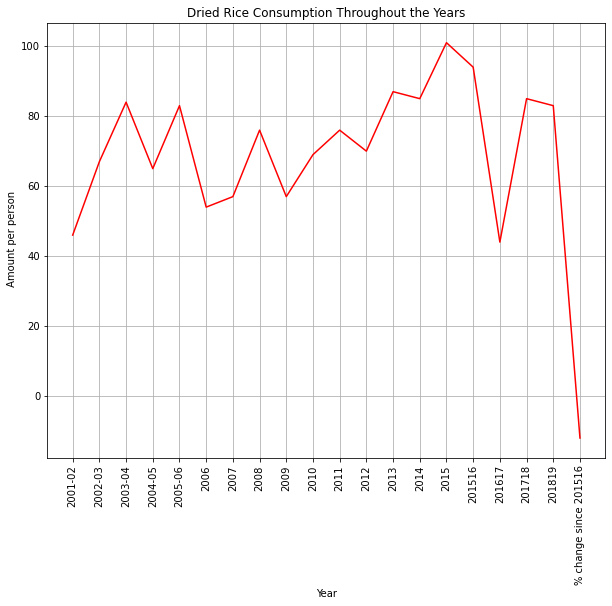

<Figure size 432x288 with 0 Axes>

In [122]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(years,numtom,color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Dried Rice Consumption Throughout the Years")
plt.show ()
plt.savefig('./Resources/data_output_images/image_file1.png', dpi=300, bbox_inches='tight')


# FINAL ANALYSIS
# There is alot of differences between the different age groups and over a long period of time, i noticed a huge drop in the consumption of chocolate solid bars for ages 30-39, from 2016-17, but suddenly picked back up greatly between 2017-18. Ages 40-49 does not have that very much difference in the consumption from the data shown, another noticeable point are for the Ages 75 and above, i noticed the consumed less over the years but more was consumed during 2018-19